In [1]:
%matplotlib inline

In [2]:
import json
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
%load_ext rpy2.ipython

**1**. (15 points) Implement the algorithm described below. Use it to sort `7,1,5,3,8,10,4,2,9,6` in ascending order.

From Wikipedia description of **selection sort**

> In computer science, selection sort is a sorting algorithm, specifically an in-place comparison sort. It has O(n2) time complexity, making it inefficient on large lists, and generally performs worse than the similar insertion sort. Selection sort is noted for its simplicity, and it has performance advantages over more complicated algorithms in certain situations, particularly where auxiliary memory is limited.

> The algorithm divides the input list into two parts: the sublist of items already sorted, which is built up from left to right at the front (left) of the list, and the sublist of items remaining to be sorted that occupy the rest of the list. Initially, the sorted sublist is empty and the unsorted sublist is the entire input list. The algorithm proceeds by finding the smallest (or largest, depending on sorting order) element in the unsorted sublist, exchanging (swapping) it with the leftmost unsorted element (putting it in sorted order), and moving the sublist boundaries one element to the right.

In [4]:
def selection_sort(xs):
    data = list(xs)
    n = len(data)
    for i in range(n):
        idx = np.argmin(data[i:]) + i
        data[i], data[idx] = data[idx], data[i]
    return data

In [5]:
nums = [7,1,5,3,8,10,4,2,9,6]
selection_sort(nums)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**2**. (15 points) Create the following table

```python
array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3,   3,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   4,   6,   4,   1,   0,   0,   0,   0,   0,   0],
       [  1,   5,  10,  10,   5,   1,   0,   0,   0,   0,   0],
       [  1,   6,  15,  20,  15,   6,   1,   0,   0,   0,   0],
       [  1,   7,  21,  35,  35,  21,   7,   1,   0,   0,   0],
       [  1,   8,  28,  56,  70,  56,  28,   8,   1,   0,   0],
       [  1,   9,  36,  84, 126, 126,  84,  36,   9,   1,   0],
       [  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1]])
```

Start with the first row

```
[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]
```

and build the subsequent rows using a simple rule that only depends on the previous row.

In [6]:
n = 11
rows = np.zeros((n,n), dtype='int')
row = np.zeros(n)
row[0] = 1
rows[0] = row
for i in range(n-1):
    pad = np.r_[[0], rows[i]]
    row = np.sum(list(zip(pad, pad[1:])), axis=1)
    rows[i+1] = row

In [7]:
rows

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3,   3,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   4,   6,   4,   1,   0,   0,   0,   0,   0,   0],
       [  1,   5,  10,  10,   5,   1,   0,   0,   0,   0,   0],
       [  1,   6,  15,  20,  15,   6,   1,   0,   0,   0,   0],
       [  1,   7,  21,  35,  35,  21,   7,   1,   0,   0,   0],
       [  1,   8,  28,  56,  70,  56,  28,   8,   1,   0,   0],
       [  1,   9,  36,  84, 126, 126,  84,  36,   9,   1,   0],
       [  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1]])

**3**. (15 points) Read the following data sets into DataFrames. 

- url1 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills.csv"
- url2 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills2000.csv"

Create a new DataFraem only containing the names present in both DataFrames. Drop the `timef` column and have a single column for `dist` , `climb` and `time` that shows the average value of the two DataFrames. The final DtataFrame will thus have 4 columns (name, dist, climb, time).

In [9]:
url1 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills.csv"
url2 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills2000.csv"

In [10]:
x1 = pd.read_csv(url1, index_col=0)
x2 = pd.read_csv(url2, index_col=0)

In [11]:
x1.head()

dist  climb    time
Greenmantle    2.5    650  16.083
Carnethy       6.0   2500  48.350
Craig Dunain   6.0    900  33.650
Ben Rha        7.5    800  45.600
Ben Lomond     8.0   3070  62.267

In [12]:
x2.head()

dist  climb      time     timef
Tiso Carnethy   6.0   2500  0.782222  0.919167
Criffel         7.0   1800  0.793333  1.003333
Chapelgill      1.5   1400  0.314444  0.376667
Norman's Law    5.0    700  0.464167  0.609167
Craig Dunain    6.0    900  0.546111  0.625833

In [13]:
df = x1.join(x2, lsuffix='_1', rsuffix='_2', how='inner')

In [14]:
df.head()

dist_1  climb_1  time_1  dist_2  climb_2    time_2     timef
Craig Dunain     6.0      900  33.650     6.0      900  0.546111  0.625833
Ben Lomond       8.0     3070  62.267     9.0     3192  1.037778  1.199167
Goatfell         8.0     2866  73.217     8.0     2866  1.227778  1.526389
Scolty           5.0      800  29.750     5.0      800  0.495833  0.579167
Traprain         6.0      650  39.750     6.5      650  0.623889  0.748611

In [15]:
(
    df.assign(dist = 0.5*(df.dist_1 + df.dist_2),
              climb = 0.5*(df.climb_1 + df.climb_2),
              time = 0.5*(df.time_1 + df.time_2)).
    drop(df.columns, axis=1)    
)

dist   climb       time
Craig Dunain       6.00   900.0  17.098056
Ben Lomond         8.50  3131.0  31.652389
Goatfell           8.00  2866.0  37.222389
Scolty             5.00   800.0  15.122917
Traprain           6.25   650.0  20.186944
Dollar             5.50  2000.0  21.844167
Lomonds            9.25  2200.0  33.026528
Black Hill         4.25   800.0   8.932389
Meall Ant-Suidhe   3.50  1500.0  14.182500
Creag Dubh         3.50  1611.5  13.340444
Criffel            6.75  1775.0  25.646667
Ben Nevis         10.00  4400.0  43.504556
Knockfarrel        5.50   900.0  16.503167
Two Breweries     18.00  5050.0  86.407917

**4**. (15 points) Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of alternating H and T (e.g. the sequence`T,T,H,H,H,T,H,H,T,H,T` has a maximum run length of 3 (`H,T,H,T`) in each experiment. 

Test the function on this sequence `T,T,H,H,H,T,H,H,T,H,T`.

Plot the discrete distribution of maximum run lengths using `seaborn`. What is the most common maximum run length?

Let $n$ = 10,000 and $k=100$.

In [16]:
def alt_runs(seq):
    current = seq[0]
    max_run = 1
    n = 1

    for s in seq[1:]:
        if s != current:
            n += 1
        else:
            max_run = max(max_run, n)
            n = 1           
        current = s
        max_run = max(max_run, n)
    return max_run

In [17]:
seq = 'T,T,H,H,H,T,H,H,T,H,T'.split(',')

In [18]:
alt_runs(seq)

4

In [19]:
n = 10000
k = 100
seqs = np.random.choice(['H', 'T'], (n, k))
max_runs = [alt_runs(seq) for seq in seqs]

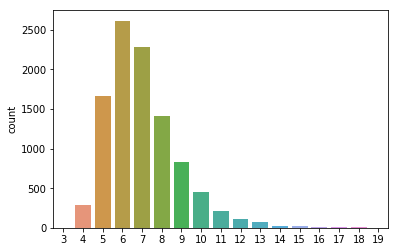

In [20]:
sns.countplot(max_runs)
pass

Most common maximum length is 6.

**5**. (15 points) Given the sequence

dna = '''
TCGGATGATTGCACTTATTCTCCGTTTGTTTGTGTGTTGCTGGGGGGGGACGCCTGCACGCTGTTCCAGTGCGTCGTCGT
ATCTTGGTTTGCCTCGGGGGGTGGGGCTGGAGCCTACCAGGTGTCGGTCGGATGTTTTGTCTCTGTGTGTCGAGGGTCGT
GTGGAGTCCCGGCGGGTGGGTGCTGCTGGGTGGTTGACACAGTGCGTGGTGGGTGCTTCAGCGGGGGGTGCCTCGCGCGT
GGCTGGGGTGTTGTAGTTGTCGTTTGGAAAGTGTGCGGCATAGGGGGGATGAAATCCGGTTGACCAAGATTCGGGTCGCG
TTTGGGGATTAGGATAGTTGGGTTTGGAAGGCGCGGGTATTGCCCACGTTCTTTGGCGGGGCGAGGGTGTTGGTACTCCA
TGTCCAGGCCGCTTGCCTACGGACTGTAGAGGTTCGGGAGGCGCTGGCCGGCGTGTGTTCCCTAGGTTTTGAGATAAGAG
'''

Replace all repeating sequences with the base and its zero padded count (so the replacement string is the same length) - e.g. `ATTGCCCA` becomes `AT2GC03A`. All rows above should be considered part of the **same** sequence.

In [21]:
dna = '''
TCGGATGATTGCACTTATTCTCCGTTTGTTTGTGTGTTGCTGGGGGGGGACGCCTGCACGCTGTTCCAGTGCGTCGTCGT
ATCTTGGTTTGCCTCGGGGGGTGGGGCTGGAGCCTACCAGGTGTCGGTCGGATGTTTTGTCTCTGTGTGTCGAGGGTCGT
GTGGAGTCCCGGCGGGTGGGTGCTGCTGGGTGGTTGACACAGTGCGTGGTGGGTGCTTCAGCGGGGGGTGCCTCGCGCGT
GGCTGGGGTGTTGTAGTTGTCGTTTGGAAAGTGTGCGGCATAGGGGGGATGAAATCCGGTTGACCAAGATTCGGGTCGCG
TTTGGGGATTAGGATAGTTGGGTTTGGAAGGCGCGGGTATTGCCCACGTTCTTTGGCGGGGCGAGGGTGTTGGTACTCCA
TGTCCAGGCCGCTTGCCTACGGACTGTAGAGGTTCGGGAGGCGCTGGCCGGCGTGTGTTCCCTAGGTTTTGAGATAAGAG
'''

In [22]:
seq = ''.join(dna.split())

In [23]:
pat = re.compile(r'(A{2,}|C{2,}|T{2,}|G{2,})')

In [24]:
locs = []
subs = []
for m in pat.finditer(seq):
    loc = m.span()
    s = m.group()
    fmt = '%s' + '%' + '0%dd' % (len(s) - 1 )
    r = fmt % (s[0], len(s))
    locs.append(loc)
    subs.append(r)

In [25]:
seq = list(seq)
for loc, sub in zip(locs, subs):
    seq[loc[0]:loc[1]] = sub
seq = ''.join(seq)
for i in range(6):
    print(seq[i*80:(i+1)*80])

TCG2ATGAT2GCACT2AT2CTC2GT03GT03GTGTGT2GCTG0000008ACGC2TGCACGCTGT2C2AGTGCGTCGTCGT
ATCT2G2T03GC2TCG00006TG004CTG2AGC2TAC2AG2TGTCG2TCG2ATGT004GTCTCTGTGTGTCGAG03TCGT
GTG2AGTC03G2CG03TG03TGCTGCTG03TG2T2GACACAGTGCGTG2TG03TGCT2CAGCG00006TGC2TCGCGCGT
G2CTG004TGT2GTAGT2GTCGT03G2A03GTGTGCG2CATAG00006ATGA03TC2G2T2GAC2A2GAT2CG03TCGCG
T03G004AT2AG2ATAGT2G03T03G2A2G2CGCG03TAT2GC03ACGT2CT03G2CG004CGAG03TGT2G2TACTC2A
TGTC2AG2C2GCT2GC2TACG2ACTGTAGAG2T2CG03AG2CGCTG2C2G2CGTGTGT2C03TAG2T004GAGATA2GAG


**6**. (15 points) One way to find a root (or zero) of a function is by bisection. This is a very simple algorithm that starts with two points `a` and `b` that bracket the location of a root (i.e. the root lies between `a`, `b` and `f(a)`, `f(b)` have different signs). The algorithm proceeds as follows:

Let `a` be the bracket boundary where `f(a) < 0` and `b` where `f(b) > 0`.

1. Find the midpoint `c` of `a` and `b`
2. If f(c) is approximately zero to some tolerance, then return root = `c` 
3. If f(c) > 0 then set `a` = `c` and repeat from 1
4. If root < 0 then set `b` = `c` and repeat from 1 

Find the root of $y = 3 - x$ with an appropriate choice of `a` and `b`. The function signature should be 

```bisect(f, a, b, tol=1e-6)```

In [26]:
def bisect(f, a, b, tol=1e-6):
    """Root finding by bisection."""
    c = (a + b)/2
    if np.abs(f(c)) < tol:
        return c
    elif f(c) > 0:
        return bisect(f, c, b)
    else:
        return bisect(f, a, c)

In [27]:
def f(x):
    return 3 - x

In [28]:
a, b = 4, 2

In [29]:
bisect(f, a, b)

3.0

**7**. (15 points) Write a function that can flatten a nested list of arbitrary depth. Check that

```python
flatten([1,[2,3],[4,[5,[6,7],8],9],10,[11,12]])
```

returns

```python
[1,2,3,4,5,6,7,8,9,10,11,12]
```

For simplicity, assume that the only data structure you will encounter is a list. You can check if an item is a list by using 

```python
isinstance(item, list)
```

In [3]:
def flatten(xss, sol=[]):
    """Flatten nested list."""
    
    for item in xss:
        if isinstance(item, list):
            flatten(item)
        else:
            sol.append(item)
    return sol

In [4]:
xss = [1,[2,3],[4,[5,[6,7],8],9],10,[11,12]]
flatten(xss)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

**8**. (15 points) Use `np.fromfunction` to construct the following matrix.

```python
array([[100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0],
       [ 81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1],
       [ 64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4],
       [ 49,  36,  25,  16,   9,   4,   1,   0,   1,   4,   9],
       [ 36,  25,  16,   9,   4,   1,   0,   1,   4,   9,  16],
       [ 25,  16,   9,   4,   1,   0,   1,   4,   9,  16,  25],
       [ 16,   9,   4,   1,   0,   1,   4,   9,  16,  25,  36],
       [  9,   4,   1,   0,   1,   4,   9,  16,  25,  36,  49],
       [  4,   1,   0,   1,   4,   9,  16,  25,  36,  49,  64],
       [  1,   0,   1,   4,   9,  16,  25,  36,  49,  64,  81],
       [  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100]])
```

Manipulate the matrix so it becomes this

```python
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7],
       [ 4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6],
       [ 5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5],
       [ 6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4],
       [ 7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3],
       [ 8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2],
       [ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1],
       [10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0]])
```

In [34]:
xs = np.fromfunction(lambda i, j: ((i-5) + (j-5))**2, (11, 11), dtype='int')

In [35]:
xs

array([[100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0],
       [ 81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1],
       [ 64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4],
       [ 49,  36,  25,  16,   9,   4,   1,   0,   1,   4,   9],
       [ 36,  25,  16,   9,   4,   1,   0,   1,   4,   9,  16],
       [ 25,  16,   9,   4,   1,   0,   1,   4,   9,  16,  25],
       [ 16,   9,   4,   1,   0,   1,   4,   9,  16,  25,  36],
       [  9,   4,   1,   0,   1,   4,   9,  16,  25,  36,  49],
       [  4,   1,   0,   1,   4,   9,  16,  25,  36,  49,  64],
       [  1,   0,   1,   4,   9,  16,  25,  36,  49,  64,  81],
       [  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100]])

In [36]:
np.sqrt(np.fliplr(xs)).astype('int')

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7],
       [ 4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6],
       [ 5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5],
       [ 6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4],
       [ 7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3],
       [ 8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2],
       [ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1],
       [10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0]])

**9**. (15 points) Normalize the matrix below so that all rows have a median of 0 and a median absolute deviation (MAD) of 1. The MAD is defined as 

$${\displaystyle \operatorname {MAD} =\operatorname {median} \left(\ \left|X_{i}-\operatorname {median} (X)\right|\ \right),\,}$$

```
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])
```

In [37]:
xs = np.random.random((4,5))

In [38]:
xs

array([[ 0.11397207,  0.85481192,  0.2580828 ,  0.30109895,  0.59648828],
       [ 0.78320556,  0.03322943,  0.66218644,  0.16542733,  0.12942973],
       [ 0.64503491,  0.53462056,  0.36775079,  0.85156458,  0.98497404],
       [ 0.58526038,  0.09989535,  0.89792125,  0.34725153,  0.26384124]])

In [39]:
num =(xs - np.median(xs, axis=1)[:, None])
den = np.median(np.abs(xs - np.median(xs, axis=1)[:, None]), axis=1)[:, None]

In [40]:
ys = num/den

In [41]:
np.median(ys, axis=1)

array([ 0.,  0.,  0.,  0.])

In [42]:
for y in ys:
    print(np.median(np.abs(y - np.median(y))))

1.0
1.0
1.0
1.0


**10**. (15 points) Find all packages imported in all the Jupyter notebooks in the `../lessons` director. If only a sub-packages was imported, only list the sub-package and not the parent (e.g. `scipy.stats` and not `scipy`). For simplicity, we will assume that all  import statements take one of the following forms

- import foo
- import foo as f
- from foo import bar
- from foo import bar as f

Display the unique packages and sub-packages imported sorted in lexicographical order.

- Note 1: `foo` may itself be a sub-package (e.g. `scipy.stats`). 
- Note 2: In the JSON file (Jupyter notebooks are stored as JSON files), each line of code begins with the `"` quote mark. You can use this as a beginning of string indicator.
- Note 3: A package name may only contain letters, numbers and the symbols `_` and `.`

In [43]:
pat1 = re.compile("\"import\s+([A-Za-z0-9_.]+)\s*")
pat2 = re.compile("\"import\s+([A-Za-z0-9_.]+)\s+.*")
pat3 = re.compile("\"from\s+([A-Za-z0-9_.]*)\s+import\s+([A-Za-z0-9_]*)\s*")
pat4 = re.compile("\"from\s+([A-Za-z0-9_.]*)\s+import\s+([A-Za-z0-9_]*)\s+.*")

packages = []
for f in glob.glob('../lessons/*ipynb'):
    text = open(f).read()
    for pat in [pat1]:
        packages.extend(pat.findall(text))
    for pat in [pat3, pat4]:
        packages.extend(['.'.join(item) for item in pat.findall(text)])
sorted(set(packages))

['IPython.display.YouTubeVideo',
 'anytree.Node',
 'anytree.dotexport.RenderTreeGraph',
 'arrow',
 'collections',
 'collections.Counter',
 'collections.abc.Mapping',
 'collections.deque',
 'collections.namedtuple',
 'dash',
 'dash.dependencies.Input',
 'dash_core_components',
 'dash_html_components',
 'datetime',
 'datetime.datetime',
 'feather',
 'functools.partial',
 'functools.reduce',
 'ggplot.',
 'h5py',
 'heapq',
 'itertools',
 'json',
 'math',
 'matplotlib.pyplot',
 'nltk',
 'numba.njit',
 'numpy',
 'numpy.core.umath_tests.matrix_multiply',
 'numpy.random',
 'operator',
 'pandas',
 'pandas.DataFrame',
 'pandas.Series',
 'pandas.tools.plotting.andrews_curves',
 'pandas_datareader.data',
 'pickle',
 'pip',
 'plotly',
 'plotly.graph_objs',
 're',
 'requests',
 'seaborn',
 'sklearn.decomposition.PCA',
 'sklearn.ensemble.RandomForestClassifier',
 'sklearn.linear_model.LogisticRegression',
 'sklearn.manifold.MDS',
 'sklearn.metrics.classification_report',
 'sklearn.model_selection.Gri